In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import gdown
import pandas as pd

file_id = "1qcRjG8YEcGEF2W8_K718VNU_VnLUvJ1O"
url = f'https://drive.google.com/uc?id={file_id}'
output = 'temporary.csv'
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1qcRjG8YEcGEF2W8_K718VNU_VnLUvJ1O
To: /Users/kothasravani/mlops/temporary.csv
100%|█████████████████████████████████████| 71.5M/71.5M [00:19<00:00, 3.71MB/s]


In [3]:
data.shape

(423006, 27)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423006 entries, 0 to 423005
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  423003 non-null  float64
 1   name        331110 non-null  object 
 2   region      251262 non-null  object 
 3   team        155160 non-null  object 
 4   affiliate   241916 non-null  object 
 5   gender      331110 non-null  object 
 6   age         331110 non-null  float64
 7   height      159869 non-null  float64
 8   weight      229890 non-null  float64
 9   fran        55426 non-null   float64
 10  helen       30279 non-null   float64
 11  grace       40745 non-null   float64
 12  filthy50    19359 non-null   float64
 13  fgonebad    29738 non-null   float64
 14  run400      22246 non-null   float64
 15  run5k       36097 non-null   float64
 16  candj       104435 non-null  float64
 17  snatch      97280 non-null   float64
 18  deadlift    115323 non-null  float64
 19  ba

In [5]:
# Remove not relevant columns
data = data.dropna(subset=['region','age','weight','height','howlong','gender','eat', \
                               'train','background','experience','schedule','howlong', \
                               'deadlift','candj','snatch','backsq','experience',\
                               'background','schedule','howlong'])
data = data.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',\
                              'filthy50','fgonebad','run400','run5k','pullups','train'])

In [6]:
    # Remove Outliers

data = data[data['weight'] < 1500]
data = data[data['age'] >= 18]
data = data[(data['height'] < 96) & (data['height'] > 48)]

data = data[(data['deadlift'] > 0) & (data['deadlift'] <= 1105)|((data['gender'] == 'Female') \
                 & (data['deadlift'] <= 636))]
data = data[(data['candj'] > 0) & (data['candj'] <= 395)]
data = data[(data['snatch'] > 0) & (data['snatch'] <= 496)]
data = data[(data['backsq'] > 0) & (data['backsq'] <= 1069)]

In [7]:
# Clean Survey Data

decline_dict = {'Decline to answer|': np.nan}
data = data.replace(decline_dict)
data = data.dropna(subset=['background','experience','schedule','howlong','eat'])

In [8]:
data['gender'].value_counts()

Male      21823
Female     8206
--            1
Name: gender, dtype: int64

In [9]:
data = data[data['gender'] != '--']

In [10]:
data.columns

Index(['region', 'gender', 'age', 'height', 'weight', 'candj', 'snatch',
       'deadlift', 'backsq', 'eat', 'background', 'experience', 'schedule',
       'howlong'],
      dtype='object')

In [11]:
data.shape

(30029, 14)

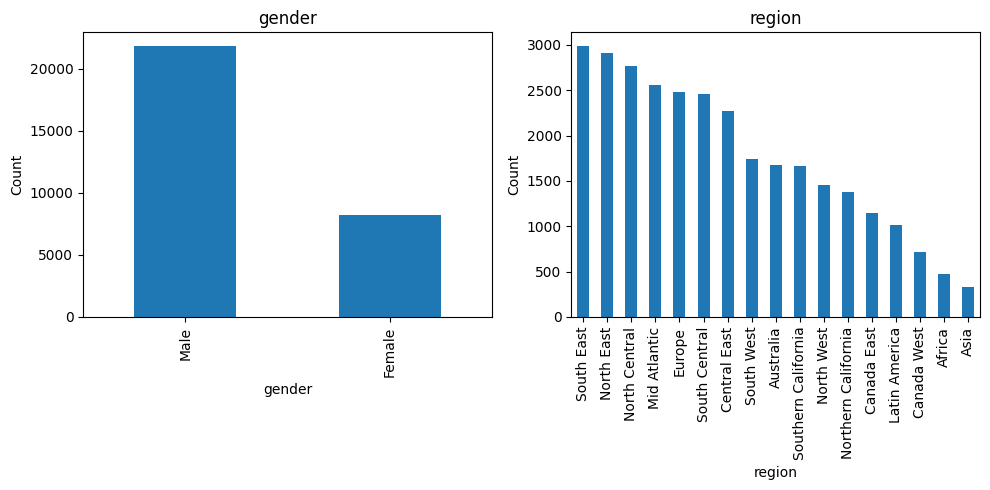

In [12]:
import matplotlib.pyplot as plt

# Define the list of categorical variables you want to plot
categorical_variables = ['gender', 'region'] 

# Create subplots based on the number of categorical variables
num_variables = len(categorical_variables)
fig, axes = plt.subplots(1, num_variables, figsize=(5 * num_variables, 5))

# Iterate through the categorical variables and plot a bar chart for each variable
for i, variable in enumerate(categorical_variables):
    ax = axes[i]
    data[variable].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(variable)
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_79440/2347597295.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], color=color, ax=ax)
/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_79440/2347597295.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da

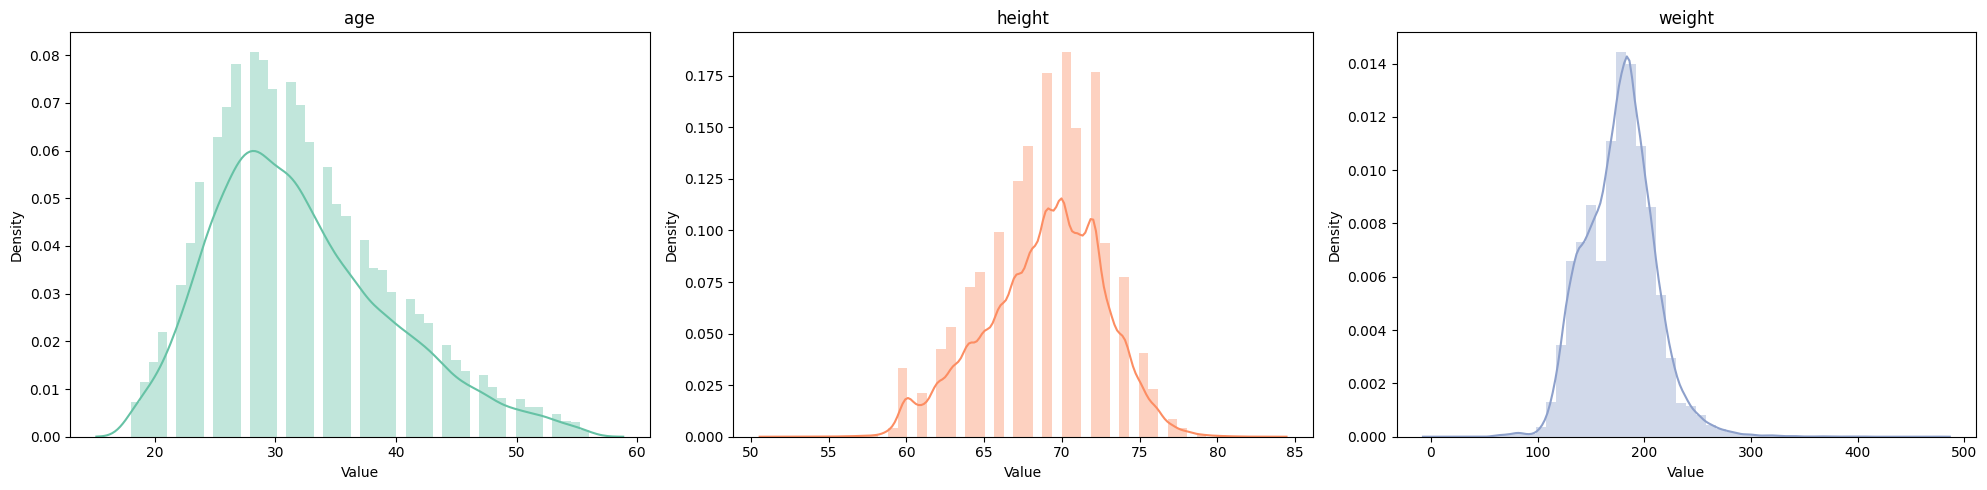

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the list of variables you want to plot
variables = ['age', 'height', 'weight']

# Use the "Set1" color palette for brighter colors
color_palette = "Set2"
color_gradient = sns.color_palette(color_palette, n_colors=len(variables))

# Create subplots for the four variables in a single row
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Iterate through the variables and plot distribution plots for each variable with a color from the gradient
for i, (variable, color) in enumerate(zip(variables, color_gradient)):
    ax = axes[i]
    sns.distplot(data[variable], color=color, ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_79440/293248617.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], color=color, ax=ax)
/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_79440/293248617.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data

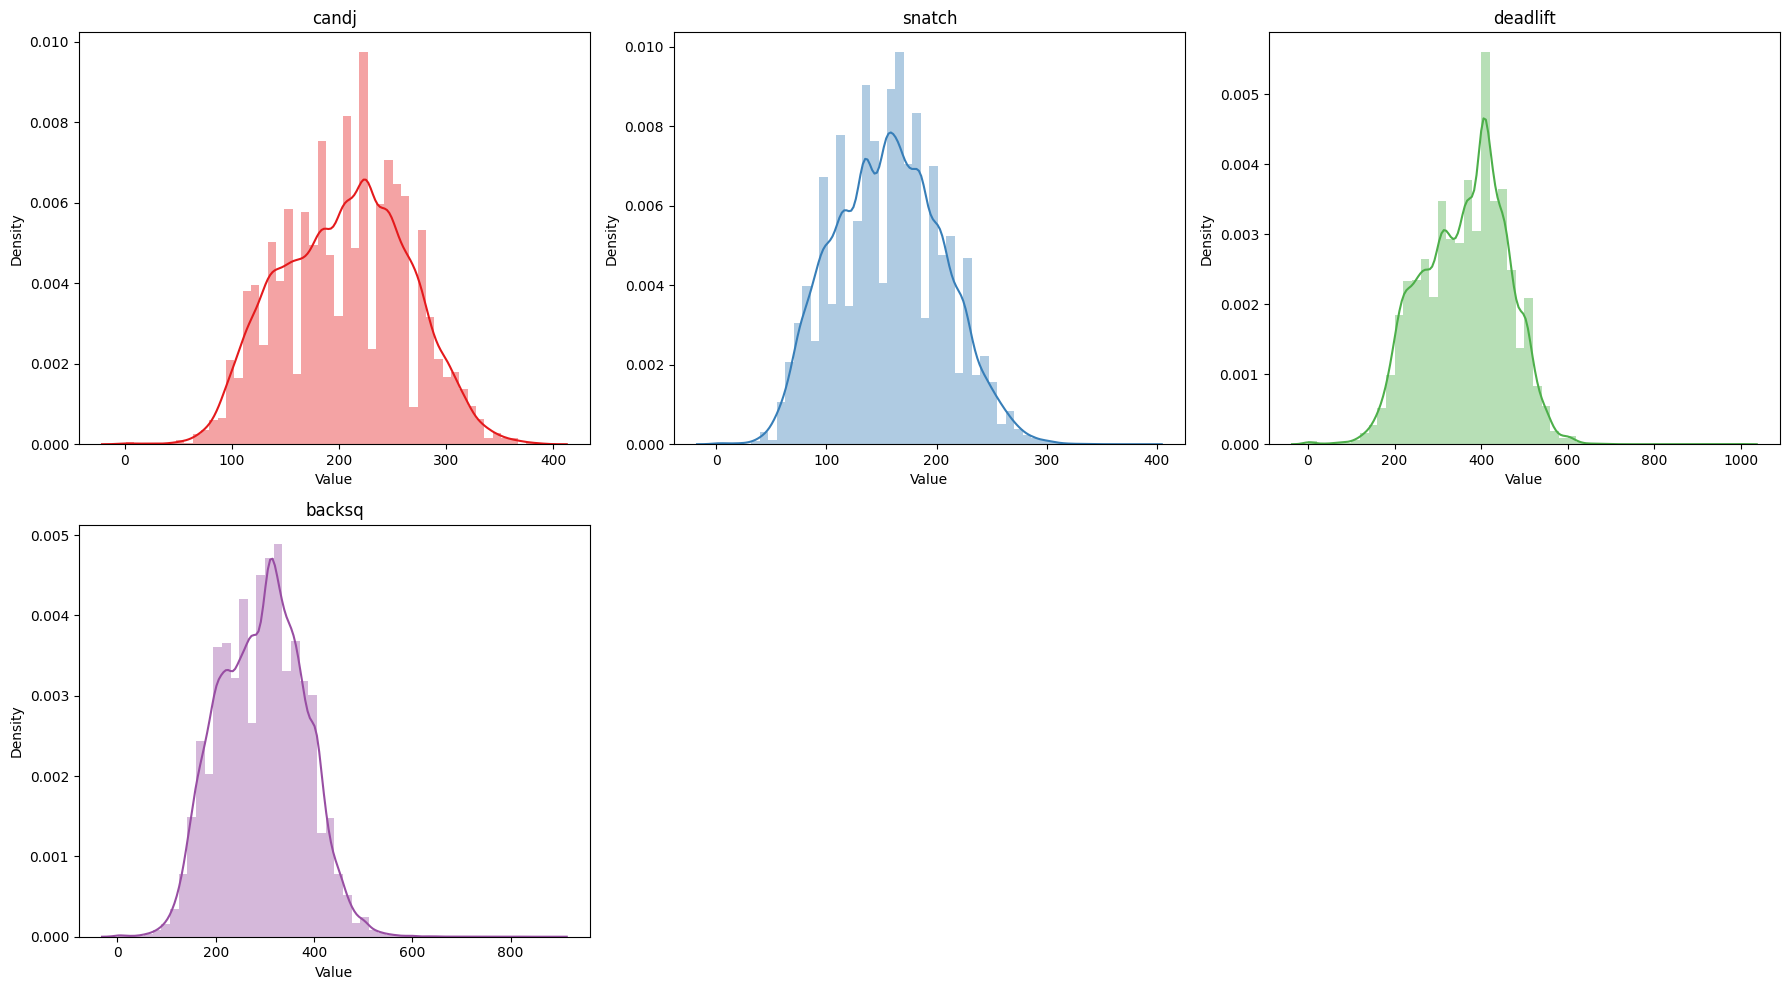

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of variables you want to plot
variables = ['candj', 'snatch', 'deadlift', 'backsq']

# Use the "Set1" color palette for brighter colors
color_palette = "Set1"
color_gradient = sns.color_palette(color_palette, n_colors=len(variables))

# Calculate the number of rows needed
num_rows = (len(variables) + 2) // 3  # Rounds up to the nearest integer

# Create subplots with the calculated number of rows and three columns
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

# Iterate through the variables and plot distribution plots for each variable with a color from the gradient
for i, (variable, color) in enumerate(zip(variables, color_gradient)):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    ax = axes[row, col]
    sns.distplot(data[variable], color=color, ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# If there are empty subplots in the last row, remove them
if len(variables) % 3 != 0:
    for i in range(len(variables) % 3, 3):
        fig.delaxes(axes[-1, i])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
data['total_lift'] = data['candj'] + data['snatch'] + data['deadlift'] + data['backsq']

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_79440/4001992598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_lift'])


<AxesSubplot: xlabel='total_lift', ylabel='Density'>

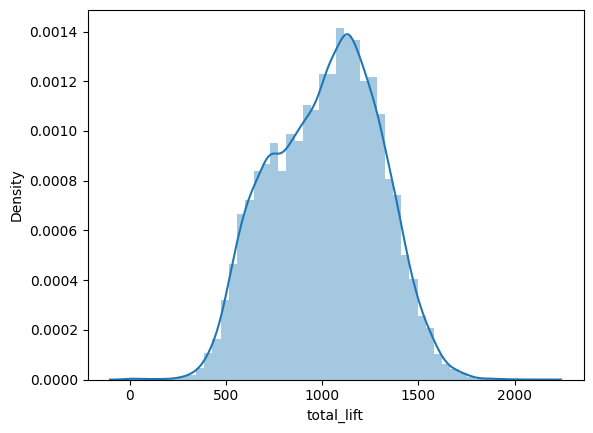

In [16]:
sns.distplot(data['total_lift'])

In [17]:
data.drop(['candj','snatch','deadlift','backsq'], axis=1, inplace=True)

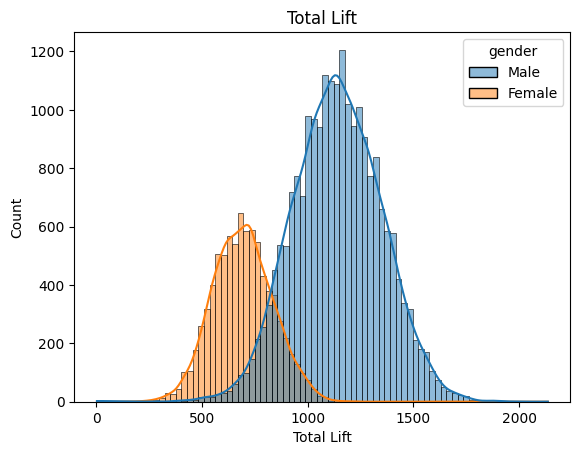

In [18]:
sns.histplot(data = data, x = 'total_lift', hue = 'gender',kde = True)
plt.title('Total Lift')
plt.xlabel('Total Lift')
plt.show()

In [19]:
## Creating new features

In [20]:
# 1. Calculate BMI
data['bmi'] = data['weight'] / (data['height']/100)**2
data.drop(['height'], axis=1, inplace=True)

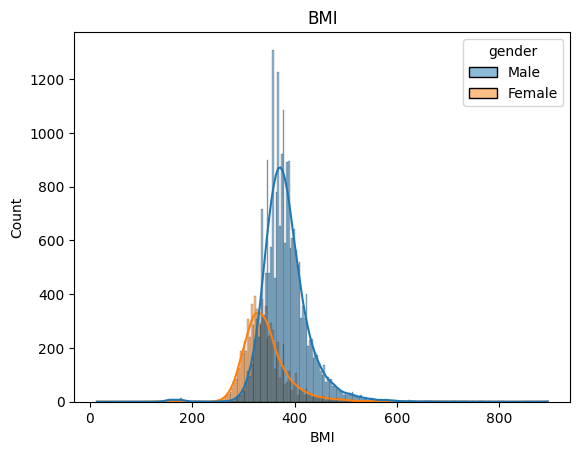

In [21]:
sns.histplot(data = data, x = 'bmi', hue = 'gender',kde = True)
plt.title('BMI')
plt.xlabel('BMI')
plt.show()

In [22]:

# 2. Lift Efficiency
data['lift_efficiency'] = data['total_lift'] / data['weight']
data.drop(['weight'], axis=1, inplace=True)

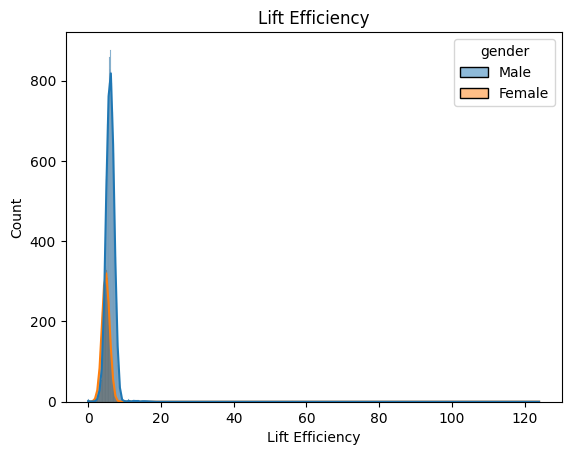

In [23]:
sns.histplot(data = data, x = 'lift_efficiency', hue = 'gender',kde = True)
plt.title('Lift Efficiency')
plt.xlabel('Lift Efficiency')
plt.show()

In [24]:
data = pd.get_dummies(data, columns=['gender'], drop_first=True)

In [25]:
data = pd.get_dummies(data, columns=['region'], drop_first=True)

In [26]:
bins = [17, 27, 37, 47, 56]  # Define age bins
labels = ['Young Adults', 'Adults', 'Middle-Aged', 'Senior Adults']  # Corresponding labels for the bins

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)
data = pd.get_dummies(data, columns=['age_group'], drop_first=True)
data.drop(['age'], axis=1, inplace=True)

In [27]:
mean_lift = data['total_lift'].mean()
std_lift = data['total_lift'].std()

conditions = [
    data['total_lift'] < mean_lift - std_lift,
    (data['total_lift'] >= mean_lift - std_lift) & (data['total_lift'] <= mean_lift + std_lift),
    data['total_lift'] > mean_lift + std_lift
]

categories = ['Below average', 'Average', 'Above average']

data['performance_category'] = np.select(conditions, categories, default='Unknown')

data = pd.get_dummies(data, columns=['performance_category'], drop_first=True)


In [28]:

# Creating binary columns for eat
data['eat_quality_foods'] = data['eat'].str.contains("I eat quality foods but don't measure the amount").astype(int)
data['eat_cheat_meals'] = data['eat'].str.contains("I eat 1-3 full cheat meals per week").astype(int)
data['eat_whatever_is_convenient'] = data['eat'].str.contains("I eat whatever is convenient").astype(int)
data['weigh_and_measure_food'] = data['eat'].str.contains("I weigh and measure my food").astype(int)
data['eat_strict_paleo'] = data['eat'].str.contains("I eat strict Paleo").astype(int)
data.drop('eat', axis=1, inplace=True)

In [29]:
# Creating binary columns for background
data['played_youth_highschool_sports'] = data['background'].str.contains("I played youth or high school level sports").astype(int)
data['regularly_play_recreational_sports'] = data['background'].str.contains("I regularly play recreational sports").astype(int)
data['no_athletic_background'] = data['background'].str.contains("I have no athletic background besides CrossFit").astype(int)
data['played_college_sports'] = data['background'].str.contains("I played college sports").astype(int)
data['played_professional_sports'] = data['background'].str.contains("I played professional sports").astype(int)
data.drop('background', axis=1, inplace=True)

In [30]:
# Creating binary columns for each category in the 'experience' feature

data['began_with_coach'] = data['experience'].str.contains("I began CrossFit with a coach \(e.g. at an affiliate\)").astype(int)
data['life_changing_experience'] = data['experience'].str.contains("I have had a life changing experience due to CrossFit").astype(int)
data['began_alone'] = data['experience'].str.contains("I began CrossFit by trying it alone \(without a coach\)").astype(int)
data['completed_level_1'] = data['experience'].str.contains("I have completed the CrossFit Level 1 certificate course").astype(int)
data['attended_specialty_courses'] = data['experience'].str.contains("I have attended one or more specialty courses").astype(int)
data['trains_others'] = data['experience'].str.contains("I train other people").astype(int)
data.drop('experience', axis=1, inplace=True)


In [31]:
# Creating binary columns for each category in the 'schedule' feature
data['1_workout_a_day'] = data['schedule'].str.contains("I usually only do 1 workout a day").astype(int)
data['multi_workouts_3plus_times'] = data['schedule'].str.contains("I do multiple workouts in a day 3+ times a week").astype(int)
data['multi_workouts_2x_a_week'] = data['schedule'].str.contains("I do multiple workouts in a day 2x a week").astype(int)
data['multi_workouts_1x_a_week'] = data['schedule'].str.contains("I do multiple workouts in a day 1x a week").astype(int)
data['strictly_schedule_rest'] = data['schedule'].str.contains("I strictly schedule my rest days").astype(int)
data['rest_4_or_more_days'] = data['schedule'].str.contains("I typically rest 4 or more days per month").astype(int)
data['rest_fewer_than_4_days'] = data['schedule'].str.contains("I typically rest fewer than 4 days per month").astype(int)
data.drop('schedule', axis=1, inplace=True)



In [32]:

# Creating binary columns for each category in the 'howlong' feature
data['2_4_years'] = data['howlong'].str.contains("2-4 years").astype(int)
data['1_2_years'] = data['howlong'].str.contains("1-2 years").astype(int)
data['4plus_years'] = data['howlong'].str.contains("4+ years").astype(int)
data['6_12_months'] = data['howlong'].str.contains("6-12 months").astype(int)
data['less_than_6_months'] = data['howlong'].str.contains("Less than 6 months").astype(int)
data.drop('howlong', axis=1, inplace=True)


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30029 entries, 21 to 422961
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   total_lift                          30029 non-null  float64
 1   bmi                                 30029 non-null  float64
 2   lift_efficiency                     30029 non-null  float64
 3   gender_Male                         30029 non-null  uint8  
 4   region_Asia                         30029 non-null  uint8  
 5   region_Australia                    30029 non-null  uint8  
 6   region_Canada East                  30029 non-null  uint8  
 7   region_Canada West                  30029 non-null  uint8  
 8   region_Central East                 30029 non-null  uint8  
 9   region_Europe                       30029 non-null  uint8  
 10  region_Latin America                30029 non-null  uint8  
 11  region_Mid Atlantic                 300

In [34]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['total_lift']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Assuming 'data' is your dataframe
X = data.drop('total_lift', axis=1)  # All columns except the dependent variable
y = data['total_lift']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf.predict(X_test)

# Evaluating the model using various metrics:

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2}")

# Explained Variance Score (EVS)
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score (EVS): {evs}")


Mean Squared Error (MSE): 0.04928521588307106
Root Mean Squared Error (RMSE): 0.22200273845849527
Mean Absolute Error (MAE): 0.1637904019438785
R-squared (R^2): 0.9505246866795353
Explained Variance Score (EVS): 0.9505258454216996


In [36]:
# Extracting feature importances and names
features = X.columns
feature_importances = rf.feature_importances_

# Create a dataframe for feature importances
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the dataframe based on importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Display the sorted dataframe
print(feature_df)



                               Feature  Importance
2                          gender_Male    0.515029
1                      lift_efficiency    0.218568
22        performance_category_Average    0.115783
0                                  bmi    0.064752
23  performance_category_Below average    0.056388
32               played_college_sports    0.001402
19                    age_group_Adults    0.000919
40                     1_workout_a_day    0.000904
45                 rest_4_or_more_days    0.000877
25                     eat_cheat_meals    0.000846
30  regularly_play_recreational_sports    0.000845
48                           1_2_years    0.000825
35            life_changing_experience    0.000819
29      played_youth_highschool_sports    0.000807
44              strictly_schedule_rest    0.000776
24                   eat_quality_foods    0.000768
39                       trains_others    0.000764
26          eat_whatever_is_convenient    0.000752
37                   completed_

In [37]:
# Define a list of columns to keep
columns_to_keep = [
    'gender_Male',
    'lift_efficiency',
    'performance_category_Average',
    'bmi',
    'performance_category_Below average',
    'played_college_sports',
    'total_lift' # You need to keep the dependent variable for now
]

# Drop all other columns
data = data[columns_to_keep]

# Assuming 'data' is your dataframe
X = data.drop('total_lift', axis=1)  # All columns except the dependent variable
y = data['total_lift']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = rf.predict(X_test)

# Evaluating the model using various metrics:

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2}")

# Explained Variance Score (EVS)
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score (EVS): {evs}")

Mean Squared Error (MSE): 0.04482420108470092
Root Mean Squared Error (RMSE): 0.2117172668553534
Mean Absolute Error (MAE): 0.14334736646782892
R-squared (R^2): 0.9550029080066007
Explained Variance Score (EVS): 0.9550058045083671
